In [11]:
import numpy as np
import pandas as pd

In [12]:
pd.options.mode.chained_assignment = None 

In [15]:
# https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
df = pd.read_csv('../data/telecom_churn.csv')

In [16]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [18]:
df['Churn'] = df['Churn'].astype(int)

## Prepare data

In [24]:
y = df['Churn']
X_all = df.drop(columns='Churn')

In [25]:
import sys
sys.path.append("../")

In [26]:
# custom transformers
from transformers.dummy_transformer import DummyTransformer
from transformers.item_selector import ItemSelector

In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

In [28]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [29]:
num_cols = list(X_all.select_dtypes([np.number]).columns)
num_cols

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [30]:
dummy_cols = ['State', 'International plan', 'Voice mail plan']

In [31]:
X_num = X_all[num_cols]

In [32]:
dt = DummyTransformer(columns_to_dummies=dummy_cols)

## Apply classifiers

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Lasso

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split

In [59]:
BaggingClassifier?

In [99]:
# predictor = DummyClassifier(strategy="most_frequent")

# predictor = DecisionTreeClassifier()
predictor = RandomForestClassifier(n_estimators=100)
# predictor = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

pred_pipe = Pipeline(steps=[
    ('prep', dt),
    ('predict',predictor)
])

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.2)

In [91]:
pred_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 DummyTransformer(add_unseen_column=False,
                                  columns_to_dummies=['State',
                                                      'International plan',
                                                      'Voice mail plan'],
                                  n_minus_one=False, sep='=', sparse=False,
                                  unseen_name='unseen')),
                ('predict',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='most_frequent'))],
         verbose=False)

In [92]:
y_pred = pred_pipe.predict(X_test)

## Evaluate

In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    f1_score, precision_score, recall_score, confusion_matrix

In [93]:
roc_auc_score(y_test, y_pred)

0.5

In [ ]:
# decision_tree = 0.84
# rf = 0.83
# bagging_dc = 0.86

In [94]:
accuracy_score(y_test, y_pred)

0.8425787106446777

In [ ]:
# bagging_rf = 0.95
# rf = 0.956
# dc = 0.91

In [95]:
precision_score(y_test, y_pred)

/Users/nickkon/.local/share/virtualenvs/itea-intro-ds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### ROC curve

In [39]:
import matplotlib.pyplot as plt

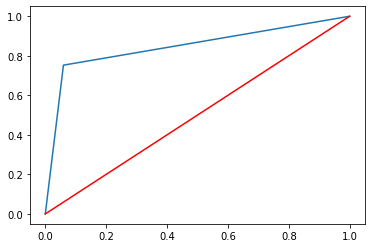

In [40]:
# calculate roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# make a plot
plt.plot(fpr, tpr);
plt.plot(np.linspace(0,1), np.linspace(0,1), color='red');

## CrossValidation

In [96]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold


In [108]:
StratifiedKFold?

In [109]:
# cv = KFold(n_splits=4, random_state=1)
cv = StratifiedKFold(n_splits=4, random_state=1)

In [110]:
cross_val_score(pred_pipe, X_train, y_train, scoring='roc_auc', cv=cv)

array([0.91843354, 0.89850626, 0.90902438, 0.89908799])

In [102]:
# array([0.90645723, 0.90853497, 0.92687279, 0.89506331])

In [111]:
cross_val_score?